In [2]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#TWITTER API CREDENTIALS
consumerKey = "FLj6bcrpPsic3rZ6kLQNa7mbH"
consumerSecret = "psOlDGnwnqBd6xo20mVHlGkAGvvKt7C6OcsysJphXQnajOrcD4"
accessToken = "1442491980554981384-v9ThsGb9jnogNgzCM0kgPJjxvKQPGb"
accessTokenSecret = "DwXNMU82ievaZRw9mh4wq0AnzIYZRkHOwmGlhmmxvLjGK"

#CREATING AUTHENTICATION OBJECT
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

#SET ACCESS TOKEN AND ACCESS TOKEN SECRET
authenticate.set_access_token(accessToken, accessTokenSecret)

#CREATING API OBJECT WHILE PASSING AUTH INFORMATION
T_API = tweepy.API(authenticate, wait_on_rate_limit=True)

#EXTRACTING 100 TWEETS FROM TWITTER USER
posts = T_API.user_timeline(screen_name="BillGates", count=100, lang="en", tweet_mode="extended")

#PRINTING THE LAST 5 TWEETS FROM THE ACCOUNT
print("SHOWING 5 TWEETS: \n")
i=1
for tweet in posts[0:5]:
  print(str(i)+")", tweet.full_text, "\n")
  i+=1


#CREATING DATAFRAME WITH COLUMN CALLED TWEETS
DF = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

#SHOW THE FIRST 5 ROWS OF DATA
DF.head()

Unexpected parameter: lang


SHOWING 5 TWEETS: 

1) RT @TEDTalks: To prevent future pandemics, @BillGates says we must invest in 3 things *now*:

1. Disease monitoring
2. Research and develop… 

2) Seven years ago, I gave a TED Talk about how the world wasn’t ready for the next epidemic. A lot has changed since then: https://t.co/3oT8MJIYrO 

3) We can’t reach zero carbon emissions without innovation. In this new series, you’ll meet some people who are on the cutting edge of clean energy: 
#EarthDay https://t.co/o6CISr0GD2 

4) Interesting article on how Liberia’s health workers use data to provide crucial insights and stop diseases from spreading: https://t.co/vKT5si3kHR 

5) I hope Namzi is feeling better. Her comics are great! https://t.co/P8nKWRy4bY 



,Tweets
0,"RT @TEDTalks: To prevent future pandemics, @Bi..."
1,"Seven years ago, I gave a TED Talk about how t..."
2,We can’t reach zero carbon emissions without i...
3,Interesting article on how Liberia’s health wo...
4,I hope Namzi is feeling better. Her comics are...


In [3]:
#CLEANING THE TEXT

#CREATING A FUNCTION TO CLEAN THE TWEETS
def cleanText(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #REMOVES @ TAGS
  text = re.sub(r'#', '', text) #REMOVES # SYMBOL
  text = re.sub(r'RT[\s]+', '', text) #REMOVES RT(RETWEETS)
  text = re.sub(r'https?:\/\/\S+', '', text) #REMOVES HYPERLINK

  return text

#CLEANING THE TEXT
DF['Tweets'] = DF['Tweets'].apply(cleanText)

#SHOWING CLEANED TEXT
DF


,Tweets
0,": To prevent future pandemics, says we must i..."
1,"Seven years ago, I gave a TED Talk about how t..."
2,We can’t reach zero carbon emissions without i...
3,Interesting article on how Liberia’s health wo...
4,I hope Namzi is feeling better. Her comics are...
...,...
95,I'm excited to talk with today about her work...
96,Through my foundation work I'm very lucky to h...
97,Understanding how the connections in our brain...
98,. is one of my favorite authors. I was eager t...


In [4]:
#CREATING A FUNCTION TO GET SUBJECTIVITY
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#CREATING A FUNCTION TO GET POLARITY
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#CREATE NEW COLUMNS
DF['Subjectivity'] = DF['Tweets'].apply(getSubjectivity)
DF['Polarity'] = DF['Tweets'].apply(getPolarity)

#SHOWING DATAFRAME WITH NEW COLUMNS
DF


,Tweets,Subjectivity,Polarity
0,": To prevent future pandemics, says we must i...",0.125000,0.000000
1,"Seven years ago, I gave a TED Talk about how t...",0.250000,0.100000
2,We can’t reach zero carbon emissions without i...,0.684848,-0.032323
3,Interesting article on how Liberia’s health wo...,0.750000,0.250000
4,I hope Namzi is feeling better. Her comics are...,0.625000,0.750000
...,...,...,...
95,I'm excited to talk with today about her work...,0.333333,0.125000
96,Through my foundation work I'm very lucky to h...,0.475000,0.238889
97,Understanding how the connections in our brain...,0.700000,0.666667
98,. is one of my favorite authors. I was eager t...,0.950000,0.500000


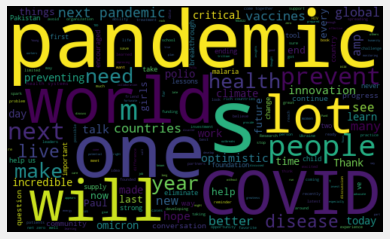

In [5]:
#PLOTTING WORD CLOUD TO GET AN IDEA
allWords = ' '.join([twts for twts in DF['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=120).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()



In [6]:
#FUNCTION TO COMPUTE THE NEGETIVE NEUTRAL AND POSITIVE ANALYSIS
def getAnalysis(score):
  if score>0:
    return "POSITIVE"
  elif score==0:
    return "NEUTRAL"
  else:
    return "NEGATIVE"
DF['Analysis'] = DF['Polarity'].apply(getAnalysis)

#SHOW DATAFRAME
DF

,Tweets,Subjectivity,Polarity,Analysis
0,": To prevent future pandemics, says we must i...",0.125000,0.000000,NEUTRAL
1,"Seven years ago, I gave a TED Talk about how t...",0.250000,0.100000,POSITIVE
2,We can’t reach zero carbon emissions without i...,0.684848,-0.032323,NEGATIVE
3,Interesting article on how Liberia’s health wo...,0.750000,0.250000,POSITIVE
4,I hope Namzi is feeling better. Her comics are...,0.625000,0.750000,POSITIVE
...,...,...,...,...
95,I'm excited to talk with today about her work...,0.333333,0.125000,POSITIVE
96,Through my foundation work I'm very lucky to h...,0.475000,0.238889,POSITIVE
97,Understanding how the connections in our brain...,0.700000,0.666667,POSITIVE
98,. is one of my favorite authors. I was eager t...,0.950000,0.500000,POSITIVE


1) Seven years ago, I gave a TED Talk about how the world wasn’t ready for the next epidemic. A lot has changed since then:  

2) Interesting article on how Liberia’s health workers use data to provide crucial insights and stop diseases from spreading:  

3) I hope Namzi is feeling better. Her comics are great!  

4) One of the surprises of the pandemic is how long it took to develop effective treatments—few people thought there would be vaccines before COVID medicines. In this first excerpt from my new book I suggest ways to speed things up during future outbreaks.  

5) One of the best parts of my job is learning from innovators and entrepreneurs taking on some of the world's greatest challenges. They make me optimistic about the world’s ability to get to net-zero carbon emissions:  

6) This week, I got to do what every nerd dreams of – talk about ideas and learn from others doing big things. I believe that with good ideas and collaboration, we can make COVID the last pandemic. 
 
P

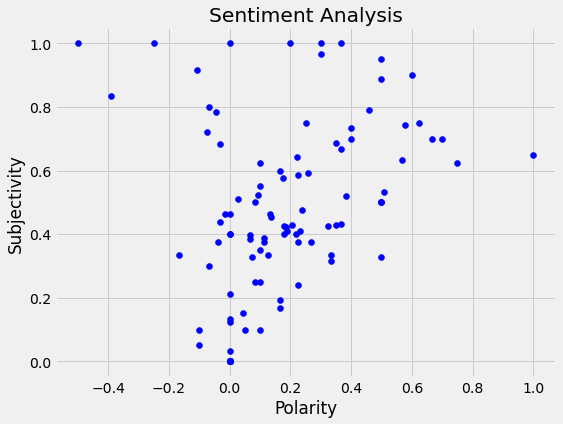

In [7]:
#PRINTING ALL POSITIVE TWEETS
j=1
sortedDF = DF.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == "POSITIVE"):
    print(str(j)+')', sortedDF['Tweets'][i], "\n")
    j=j+1;
#PRINTING ALL NEGATIVE TWEETS
j=1
sortedDF = DF.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == "NEGATIVE"):
    print(str(j)+')', sortedDF['Tweets'][i], sortedDF['Polarity'][i], "\n")
    j=j+1;

#PRINTING ALL NEUTRAL TWEETS
j=1
sortedDF = DF.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == "NEUTRAL"):
    print(str(j)+')', sortedDF['Tweets'][i], "\n")
    j=j+1;

#PLOTTING THE POLARITY AND SUBJECTIVITY
plt.figure(figsize=(8,6))
for i in range(0, DF.shape[0]):
  plt.scatter(DF['Polarity'][i], DF['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


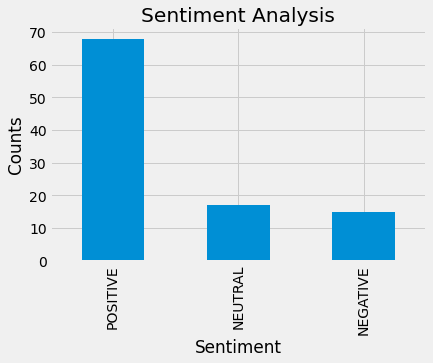

In [8]:
#GET THE PERCENTAGE OF POSITIVE TWEETS
posTweets = DF[DF.Analysis == 'POSITIVE']
posTweets = posTweets['Tweets']

round((posTweets.shape[0] / DF.shape[0])*100, 1)

#GET THE PERCENTAGE OF NEGATIVE TWEETS
negTweets = DF[DF.Analysis == 'NEGATIVE']
negTweets = negTweets['Tweets']

round((negTweets.shape[0] / DF.shape[0])*100, 1)

#SHOWING PERCENTAGES ON GRAPH
DF['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
DF['Analysis'].value_counts().plot(kind='bar')
plt.show()